In [3]:
import pandas as pd
data = pd.read_csv("sensor_data_200.txt",delimiter = " ",
                   header = None , names = ("data","time","ir","lidar"))
data

,data,time,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
...,...,...,...,...
58983,20180124,120023,313,208
58984,20180124,120026,297,200
58985,20180124,120030,323,204
58986,20180124,120033,326,207


In [6]:
print(data["lidar"][0:5])

0    214
1    211
2    199
3    208
4    212
Name: lidar, dtype: int64


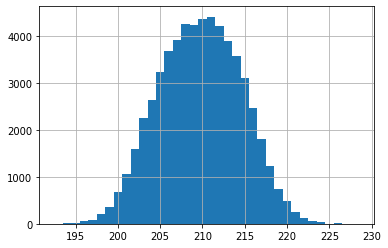

In [12]:
import matplotlib.pyplot as plt
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),align='left')
plt.show()

In [9]:
print(min(data["lidar"]))

193


In [13]:
mean1 = sum(data["lidar"].values)/len(data["lidar"].values)
mean2 = data["lidar"].mean()
print(mean1 , mean2)

209.73713297619855 209.73713297619855


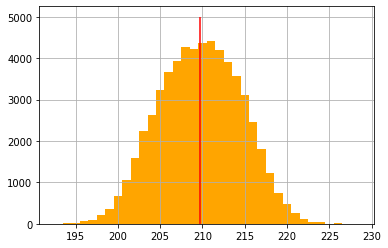

In [16]:
import matplotlib.pyplot as plt
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),align='left',color = "orange")
plt.vlines(mean1,ymin=0,ymax=5000,color="red")
plt.show()

In [21]:
#定義から計算
zs = data["lidar"].values#zsにlidar情報を入れる
mean = sum(zs) / len(zs)
diff_square = [(z - mean)**2 for z in zs]

sampling_var = sum(diff_square)/(len(zs)) #標本分散
unbiased_var = sum(diff_square)/(len(zs)-1)

print(sampling_var , unbiased_var)

#pandas
pandas_sampling_var = data["lidar"].var(ddof = 0) #標本分散
pandas_default_var = data["lidar"].var() #デフォルト（不偏分散）
print(pandas_sampling_var , pandas_default_var)

#Numpy version
import numpy as np
numpy_default_var = np.var(data["lidar"])
numpy_unbiased_var = np.var(data["lidar"],ddof = 1)
print(numpy_default_var , numpy_unbiased_var)

23.407709770274106 23.40810659855441
23.407709770274106 23.40810659855441
23.407709770274106 23.40810659855441


In [22]:
import math

#定義より
stddev1 = math.sqrt(sampling_var)
stddev2 = math.sqrt(unbiased_var)

#pandas
pandas_stddev = data["lidar"].std()

print(stddev1 , stddev2 , pandas_stddev)

4.838151482774605 4.83819249292072 4.83819249292072


In [23]:
freqs = pd.DataFrame(data["lidar"].value_counts())# 各センサ値の頻度
freqs.transpose()#横向き出力


,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409,4355,4261,4228,4201,3920,3897,3674,3572,3225,...,84,59,55,32,15,13,10,4,3,1


In [32]:
freqs["probs"] = freqs["lidar"] / len(data["lidar"])
print(len(data["lidar"]))
freqs.transpose()

58988


,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409.000000,4355.000000,4261.000000,4228.000000,4201.000000,3920.000000,3897.000000,3674.000000,3572.000000,3225.000000,...,84.000000,59.000,55.000000,32.000000,15.000000,13.00000,10.00000,4.000000,3.000000,1.000000
probs,0.074744,0.073829,0.072235,0.071676,0.071218,0.066454,0.066064,0.062284,0.060555,0.054672,...,0.001424,0.001,0.000932,0.000542,0.000254,0.00022,0.00017,0.000068,0.000051,0.000017


In [33]:
sum(freqs["probs"])

1.0

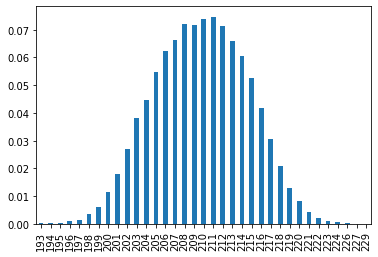

In [34]:
freqs["probs"].sort_index().plot.bar()
plt.show()
# 縦軸：確率 横軸：縦軸に対応するセンサ値
# 確率分布

In [35]:
def drawing():
    return freqs.sample(n = 1,weights = "probs").index[0]
drawing()

212